In [3]:
import pandas as pd
import numpy as np
import sklearn


In [4]:
import matplotlib.pyplot as plt
import seaborn as sn

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [6]:
cancer = load_breast_cancer()

In [7]:
df = pd.DataFrame(np.c_[cancer['data'],cancer['target']], columns = np.append(cancer['feature_names'],['target']))

In [8]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0.0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0.0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0.0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0.0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0.0


In [9]:
X = df.drop(['target'], axis=1)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
y = df['target']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 32)


In [12]:
#Training the SVM model
svc_model = SVC(kernel = 'linear', probability = True)

In [13]:
#Fitting the model in the training data
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [14]:
#predicting the model
y_predict = svc_model.predict(X_test)

In [15]:
y_predict1 = svc_model.predict(X_train)

In [16]:
#accuracy score of the model
from sklearn.metrics import accuracy_score
sklearn.metrics.accuracy_score(y_test, y_predict, normalize=True, sample_weight=None)


0.9298245614035088

In [17]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

In [18]:
result_svm = confusion_matrix(y_test, y_predict)
result_svm
#results1 = confusion_matrix(y_train, y_predict1)
#results1

array([[ 58,   8],
       [  4, 101]], dtype=int64)

In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [20]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

In [21]:
# predict probabilities
lr_probs = svc_model.predict_proba(X_test)[:,1]

In [22]:
# calculate roc curves
ns_fpr, ns_tpr, threshold_svm = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, threshold_svm = roc_curve(y_test, lr_probs)

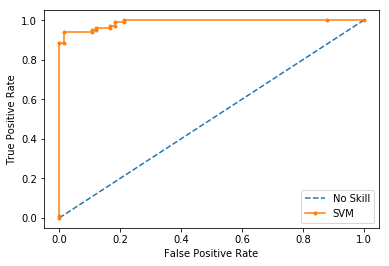

In [23]:
from matplotlib import pyplot
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=100, bootstrap=True,random_state=100)


In [51]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [52]:
y_predict = rfc_model.predict(X_test)

In [53]:
sklearn.metrics.accuracy_score(y_test, y_predict, normalize=True, sample_weight=None)

0.9532163742690059

In [55]:
result_rfc = confusion_matrix(y_test, y_predict)
result_rfc

array([[ 60,   6],
       [  2, 103]], dtype=int64)

In [54]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = rfc_model.predict_proba(X_test)[:,1]

In [56]:
# calculate roc curves
ns_fpr, ns_tpr, threshold_svm = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, threshold_svm = roc_curve(y_test, lr_probs)

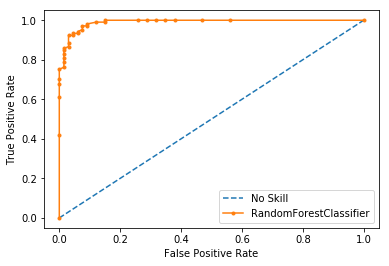

In [57]:
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='RandomForestClassifier')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()

In [58]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()

In [59]:
gnb_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [60]:
y_predict = gnb_model.predict(X_test)

In [61]:
sklearn.metrics.accuracy_score(y_test, y_predict, normalize=True, sample_weight=None)

0.9239766081871345

In [62]:
result_gnb = confusion_matrix(y_test, y_predict)
result_gnb

array([[ 57,   9],
       [  4, 101]], dtype=int64)

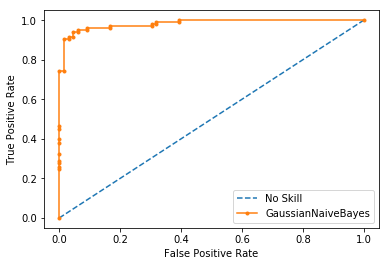

In [64]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = gnb_model.predict_proba(X_test)[:,1]
# calculate roc curves
ns_fpr, ns_tpr, threshold_gnb = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, threshold_gnb = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='GaussianNaiveBayes')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knc_model = KNeighborsClassifier(n_neighbors=3)


In [25]:
knc_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [26]:
y_predict = knc_model.predict(X_test)

In [27]:
sklearn.metrics.accuracy_score(y_test, y_predict, normalize=True, sample_weight=None)

0.9239766081871345